## Retail Sales Analysis

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv("D://Data set//online+retail//Online Retail.csv",encoding='ISO-8859-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [106]:
import seaborn as sns
sns.set()

In [107]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [108]:
df.shape

(541909, 8)

In [109]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
62526,541506,22121,NOEL WOODEN BLOCK LETTERS,1,18-01-2011 16:05,11.63,NaN,United Kingdom
537543,581310,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,5,08-12-2011 11:43,1.65,16442.0,United Kingdom
500526,578783,22230,JIGSAW TREE WITH WATERING CAN,2,25-11-2011 11:58,0.29,12748.0,United Kingdom
402817,571508,23160,REGENCY TEA SPOON,3,17-10-2011 15:27,2.46,NaN,United Kingdom
296639,562928,21881,CUTE CATS TAPE,12,10-08-2011 15:29,0.65,15494.0,United Kingdom
103108,545053,20727,LUNCH BAG BLACK SKULL.,2,27-02-2011 12:41,1.65,17516.0,United Kingdom
212352,555473,20725,LUNCH BAG RED RETROSPOT,10,03-06-2011 11:59,1.65,14700.0,United Kingdom
362837,568526,85152,HAND OVER THE CHOCOLATE SIGN,24,27-09-2011 13:04,2.10,17656.0,United Kingdom
129866,547396,21243,PINK POLKADOT PLATE,1,22-03-2011 16:54,3.29,NaN,United Kingdom
505021,578998,22093,MOTORING TISSUE BOX,2,27-11-2011 16:05,0.39,15436.0,United Kingdom


In [110]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have missing values in DESCRIPTION and CUSTOMER ID column

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [113]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


We can see Quantity and Price has some negative values which is irrelevant.

In [114]:
df["Country"].nunique()

38

In [115]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

We have customers from 38 different countries across the world.

In [116]:
df["Country"].value_counts(normalize=True).head(10)*100

United Kingdom    91.431956
Germany            1.752139
France             1.579047
EIRE               1.512431
Spain              0.467422
Netherlands        0.437527
Belgium            0.381798
Switzerland        0.369435
Portugal           0.280305
Australia          0.232327
Name: Country, dtype: float64

We got customers of 91% from UK and majorly from across Europe.

In [124]:
from datetime import datetime

In [125]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [119]:
print(f"Transactions are registered from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Transactions are registered from 2010-01-12 08:26:00 to 2011-12-10 17:19:00


We have data from January 2010 to October 2011 

In [120]:
print(f"No. of total Transactions are {df['InvoiceNo'].nunique()}")

No. of total Transactions are 25900


#### Data Visualization

<Axes: xlabel='Country', ylabel='count'>

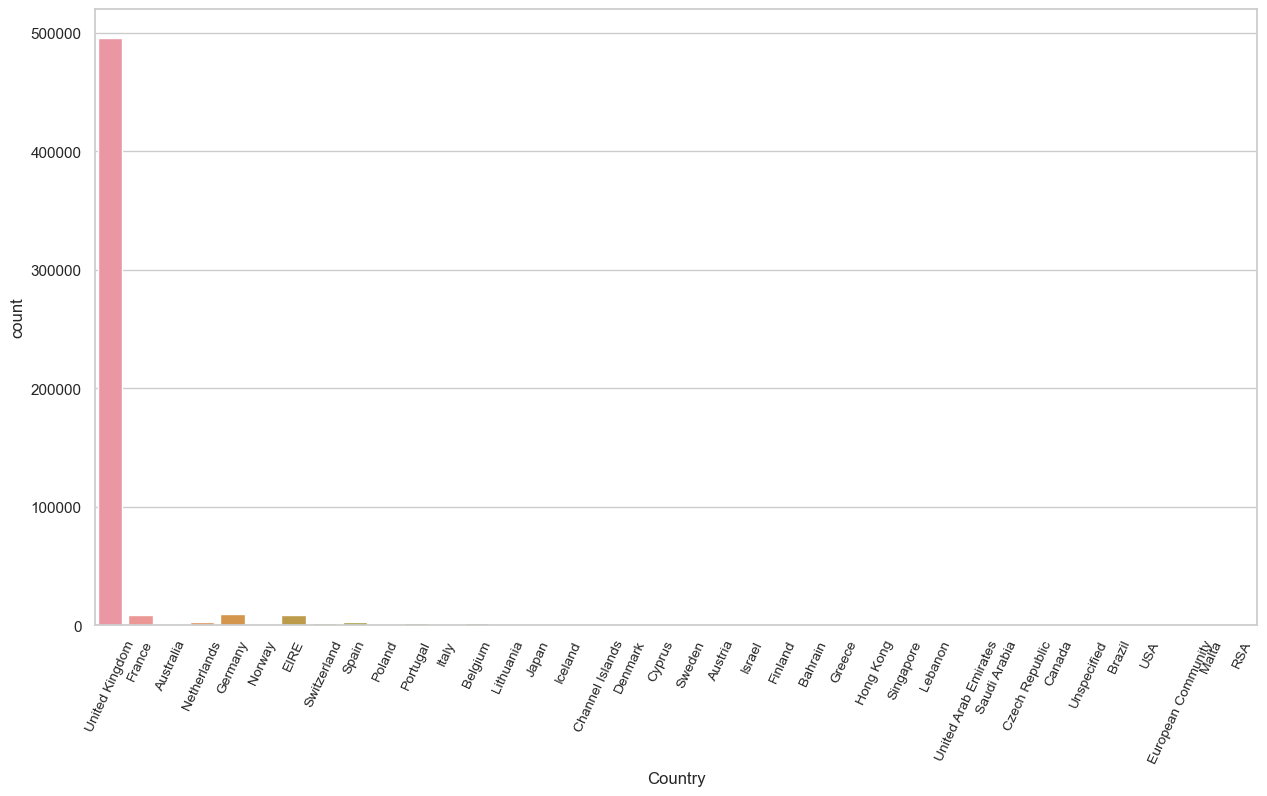

In [122]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
plt.xticks(rotation=65,size=10)
sns.countplot(x='Country',data=df)

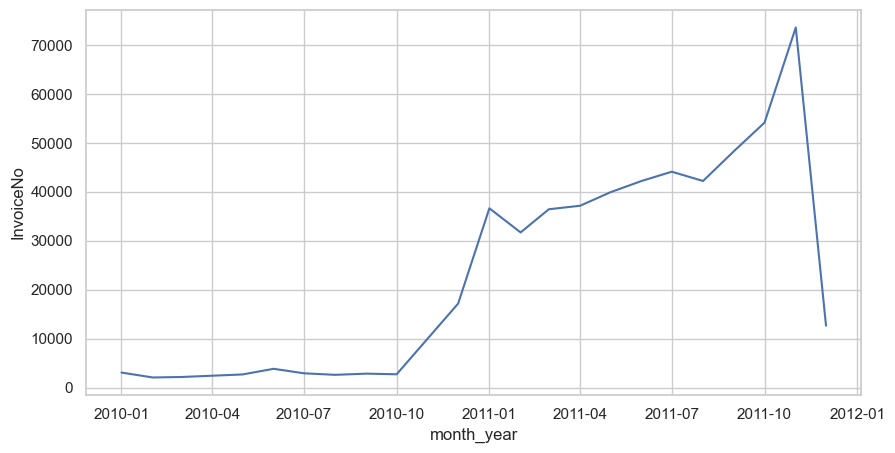

In [131]:
import datetime as dt
df['month']=df['InvoiceDate'].dt.month
df['year']=df['InvoiceDate'].dt.year
df['month_year']=pd.to_datetime(df[['year', 'month']].assign(Day=1))
df['TotalPrice']=df['Quantity']*df['UnitPrice']


sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
plot = pd.DataFrame(df.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
ax= sns.lineplot(x="month_year",y ="InvoiceNo",data=plot )

As we see the sales increases from october 2010 

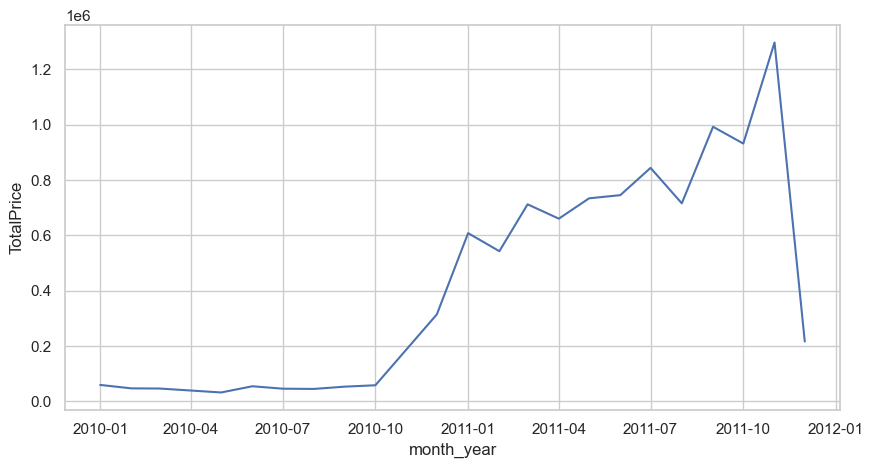

In [135]:
data2 = pd.DataFrame(df.groupby(['month_year'])['TotalPrice'].sum()).reset_index()
plt.figure(figsize=(10,5))
ax=sns.lineplot(x='month_year',y='TotalPrice',data=data2)

This graph shows that the revenue increases from november 2010 

### Handling Missing Values

In [38]:
df['Description'].nunique()

4223

In [56]:
df["Description"].isnull().mean()*100

0.2683107311375157

we have 0.26 % of missing values in Description column

In [43]:
df[df['Description'].isnull()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
229336,557031,21447,NaN,-65,2011-06-16 13:31:00,0.0,NaN,United Kingdom
148116,549180,84522,NaN,-30,2011-06-04 17:34:00,0.0,NaN,United Kingdom
195795,553745,84760S,NaN,2,2011-05-19 09:46:00,0.0,NaN,United Kingdom
356449,568053,90209C,NaN,3,2011-09-23 12:44:00,0.0,NaN,United Kingdom
74283,542414,84967A,NaN,-2,2011-01-27 17:15:00,0.0,NaN,United Kingdom
228742,556952,21784,NaN,1,2011-06-15 16:57:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-08-12 10:33:00,0.0,NaN,United Kingdom
175520,551965,21429,NaN,1,2011-05-05 13:13:00,0.0,NaN,United Kingdom
453999,575506,C2,NaN,150,2011-10-11 10:30:00,0.0,NaN,United Kingdom
108687,545565,47563B,NaN,-10,2011-03-03 16:14:00,0.0,NaN,United Kingdom


In [45]:
np.all(df[df["Description"].isnull()]["CustomerID"].isnull())

True

In [48]:
(df[df["Description"].isnull()]["Quantity"] <= 0).mean()*100

59.28473177441541

In [52]:
all(df[df["Description"].isnull()]["Country"]== "United Kingdom")

True

In [55]:
all(df[df["Description"].isnull()]["UnitPrice"] == 0.0)

True

The above stats shows that the rows which has no Description also has no Customer ID,59% of the quantity values is Negative,the only country is United Kingdom and all the price values are zero.

------------------------

In [57]:
df["CustomerID"].isnull().mean()*100

24.926694334288598

We have 24% of missing values in Customer ID.

In [58]:
df[df["CustomerID"].isnull()]["Description"].nunique()

3554

In [64]:
(df[df["CustomerID"].isnull()]['Quantity'] < 0).mean() * 100

1.272579212318626

In [65]:
(df[df["CustomerID"].isnull()]['UnitPrice'] <= 0).mean() * 100

1.8337281610897247

We have no clear idea about why there is lot of missing values in customer ID.May be the unregistered people have no customer ID.

----

#### Negative Quantity and zero Unit Price

In [69]:
(df["Quantity"] <=0 ).mean()*100

1.9604767590130447

In [77]:
(df["UnitPrice"] <=0 ).mean()*100

0.46446912673530055

2% and 0.4% of quantity and UnitPrice has neagative values in the dataset respectively .

In [78]:
df[df["Quantity"] <= 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
73936,C542395,85126,LARGE ROUND CUTGLASS CANDLESTICK,-1,2011-01-27 15:12:00,6.75,17389.0,United Kingdom
461406,C575940,84991,60 TEATIME FAIRY CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
341561,C566758,23174,REGENCY SUGAR BOWL GREEN,-1,2011-09-14 16:05:00,4.15,14292.0,United Kingdom
297905,C562956,22637,PIGGY BANK RETROSPOT,-1,2011-11-08 10:14:00,2.55,13186.0,United Kingdom
279133,C561239,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,-4,2011-07-26 10:32:00,0.65,NaN,EIRE
235958,C557664,22847,BREAD BIN DINER STYLE IVORY,-1,2011-06-21 18:00:00,14.95,NaN,EIRE
313461,C564498,BANK CHARGES,Bank Charges,-1,2011-08-25 14:22:00,77.63,NaN,United Kingdom
211305,C555360,23168,CLASSIC CAFE SUGAR DISPENSER,-5,2011-02-06 14:06:00,1.25,16133.0,United Kingdom
171985,C551511,84818,DANISH ROSE PHOTO FRAME,-6,2011-04-28 19:49:00,2.55,14311.0,United Kingdom
202229,C554373,22371,AIRLINE BAG VINTAGE TOKYO 78,-2,2011-05-24 11:23:00,3.75,16998.0,United Kingdom


According to Data description, the letter 'C' infront of InvoiceNo represents cancelled order .

In [82]:
df[df["Quantity"] <= 0]["InvoiceNo"].astype(str).str.startswith("C").mean()*100

87.42469879518072

In [85]:
(df[df["InvoiceNo"].astype("str").str.startswith("C")]["Quantity"]<=0).mean()*100

100.0

In [89]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [94]:
(df["TotalPrice"]<=0).mean()*100

2.178410028251976

-----

##### Dropping of cancelled orders

In [147]:
cancelled_orders =df[df["InvoiceNo"].astype(str).str.startswith("C")]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,month_year,TotalPrice
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,1,2010,2010-01-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,1,2010,2010-01-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,1,2010,2010-01-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,1,2010,2010-01-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,1,2010,2010-01-01,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397.0,United Kingdom,9,2011,2011-09-01,-9.13
541541,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498.0,United Kingdom,9,2011,2011-09-01,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311.0,United Kingdom,9,2011,2011-09-01,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315.0,United Kingdom,9,2011,2011-09-01,-1.25


In [150]:
len(cancelled_orders)

9288

In [154]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [156]:
df.shape

(532621, 12)

----

Lets consider the values which dont have customerID as unknown customers.
The scatter plot shows the buying tendency of customers who has customerID and without customerID.

In [160]:
df_inv = df.dropna().groupby("InvoiceNo").agg({"TotalPrice": "sum", "Quantity":"sum"})
df_inv_na = df[df["CustomerID"].isnull()].groupby("InvoiceNo").agg({"TotalPrice": "sum", "Quantity":"sum"})

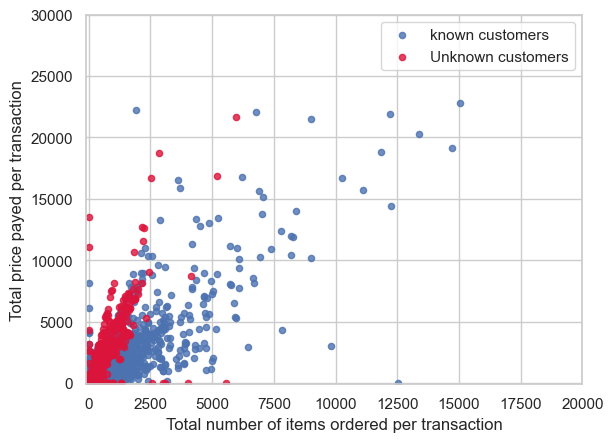

In [161]:
ax = df_inv.plot(kind="scatter", x="Quantity", y="TotalPrice", alpha=0.8, label="known customers")
df_inv_na.plot(kind="scatter", x="Quantity", y="TotalPrice", ax=ax, color="crimson", alpha=0.8, label="Unknown customers")
ax.set_ylim(-100, 30000)
ax.set_xlim(-100, 20000)
ax.set_ylabel("Total price payed per transaction")
ax.set_xlabel("Total number of items ordered per transaction")
_ = ax.legend()

The scatter plot shows that the known customers bought more items per transcaction compared to the unknown customers.
But the unknown customers bought costlier items than known customers